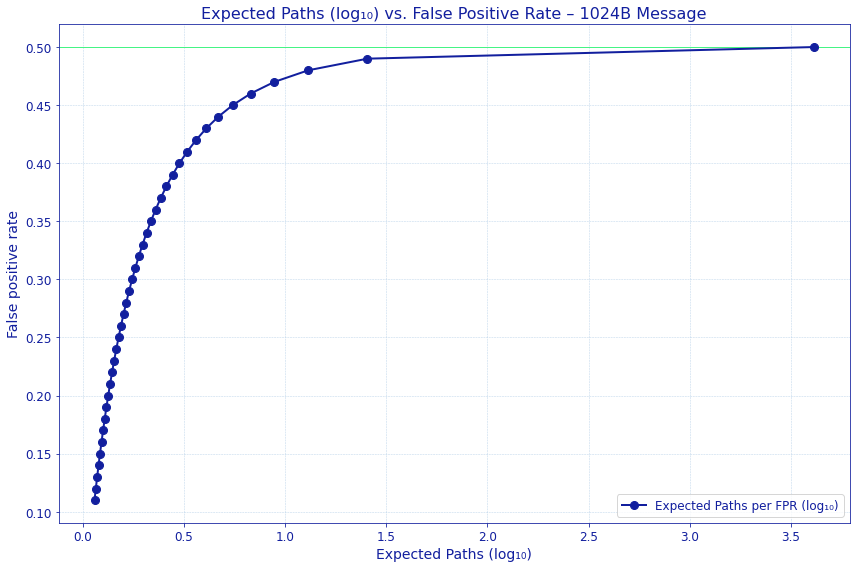

In [77]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

# Define the functions
def leaves(n: int, fpr: float):
    p = Decimal(fpr)
    return float(1 + sum([(2**i) * (p ** (i + 1)) for i in range(n)]))

# Initialize the data
n = 1024 * 8
fprs = list(np.arange(0.5, 0.1, -0.01))

fpr2leaves = np.log10(np.array([leaves(n, p) for p in fprs]))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add a line at y = 0.5
ax.axhline(y=0.5, color='#45f485', linestyle='-', linewidth=1)

# Plot the data
ax.plot(fpr2leaves, fprs, label='Expected Paths per FPR (log₁₀)', color='#121f9e', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#bcd4eb')

# Add axis labels and title
ax.set_xlabel('Expected Paths (log₁₀)', fontsize=14, color='#121f9e')
ax.set_ylabel('False positive rate', fontsize=14, color='#121f9e')
ax.set_title('Expected Paths (log₁₀) vs. False Positive Rate – 1024B Message', fontsize=16, color='#121f9e')

# Add legend
legend = ax.legend(fontsize=12)
for text in legend.get_texts():
    text.set_color('#121f9e')

# Customize ticks and spine color
ax.tick_params(axis='both', which='major', labelsize=12, colors='#121f9e')
for spine in ax.spines.values():
    spine.set_color('#121f9e')

# Show plot
plt.tight_layout()
#plt.savefig('fpr_to_paths.svg', format='svg')
plt.show()


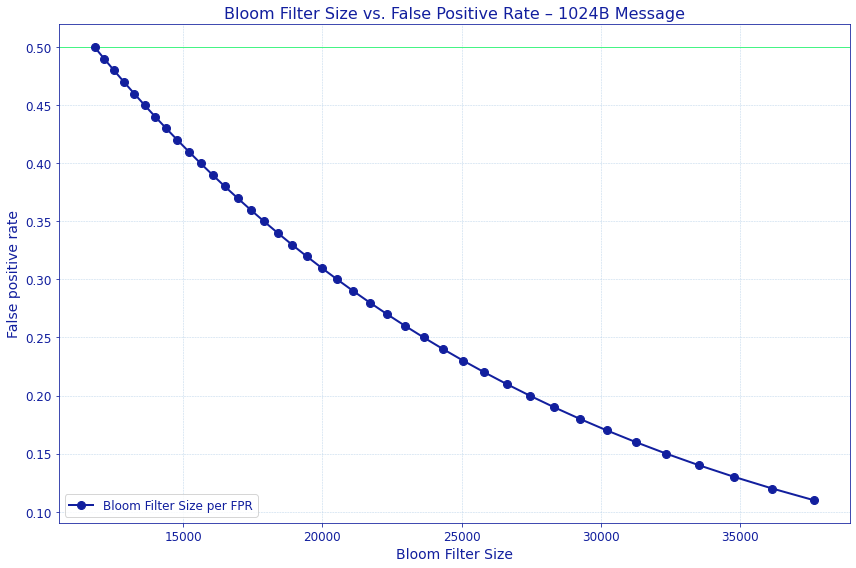

In [104]:
import numpy as np
import math
from decimal import Decimal
import matplotlib.pyplot as plt

# Define the functions
def optimal_bloom_filter_size(n: int, p: float) -> int:
    m = -(n * math.log(p)) / (math.log(2) ** 2)
    return math.ceil(m)

# Initialize the data
n = 1024 * 8
fprs = list(np.arange(0.5, 0.1, -0.01))

fpr2m = np.array([optimal_bloom_filter_size(n, p) for p in fprs])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add a line at y = 0.5
ax.axhline(y=0.5, color='#45f485', linestyle='-', linewidth=1)

# Plot the data
ax.plot(fpr2m, fprs, label='Bloom Filter Size per FPR', color='#121f9e', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#bcd4eb')

# Add axis labels and title
ax.set_xlabel('Bloom Filter Size', fontsize=14, color='#121f9e')
ax.set_ylabel('False positive rate', fontsize=14, color='#121f9e')
ax.set_title('Bloom Filter Size vs. False Positive Rate – 1024B Message', fontsize=16, color='#121f9e')

# Add legend
legend = ax.legend(fontsize=12)
for text in legend.get_texts():
    text.set_color('#121f9e')

# Customize ticks and spine color
ax.tick_params(axis='both', which='major', labelsize=12, colors='#121f9e')
for spine in ax.spines.values():
    spine.set_color('#121f9e')

# Show plot
plt.tight_layout()
#plt.savefig('fpr_to_bf_m.svg', format='svg')
plt.show()


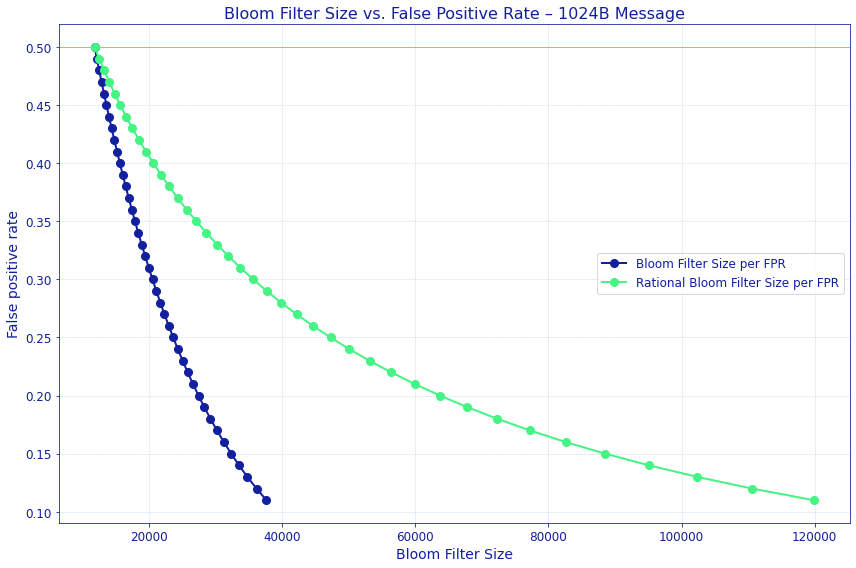

In [93]:
import numpy as np
import math
from decimal import Decimal
import matplotlib.pyplot as plt

# Define the functions
def optimal_bloom_filter_size(n: int, p: float) -> int:
    m = -(n * math.log(p)) / (math.log(2) ** 2)
    return math.ceil(m)

def optimal_k(m: int, n: int) -> float:
    k = (m / n) * math.log(2)
    return k

def optimal_rational_bloom_filter_size(n: int, fpr: float) -> int:
    bl_m = optimal_bloom_filter_size(n, fpr)
    rational_k = optimal_k(bl_m, n)
    rbl_m = -((rational_k* n) * math.log(fpr)) / (math.log(2) ** 2)
    return math.ceil(rbl_m)

# Initialize the data
n = 1024 * 8
fprs = list(np.arange(0.5, 0.1, -0.01))

fpr2m = np.array([optimal_bloom_filter_size(n, p) for p in fprs])
fpr2rm = np.array([optimal_rational_bloom_filter_size(n, p) for p in fprs])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add a line at y = 0.5
ax.axhline(y=0.5, color='#45f485', linestyle='-', linewidth=1)

# Plot the data
ax.plot(fpr2m, fprs, label='Bloom Filter Size per FPR', color='#121f9e', marker='o', linestyle='-', linewidth=2, markersize=8)
ax.plot(fpr2rm, fprs, label='Rational Bloom Filter Size per FPR', color='#45f485', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#bcd4eb')

# Add axis labels and title
ax.set_xlabel('Bloom Filter Size', fontsize=14, color='#121f9e')
ax.set_ylabel('False positive rate', fontsize=14, color='#121f9e')
ax.set_title('Bloom Filter Size vs. False Positive Rate – 1024B Message', fontsize=16, color='#121f9e')

# Add legend
legend = ax.legend(fontsize=12)
for text in legend.get_texts():
    text.set_color('#121f9e')

# Customize ticks and spine color
ax.tick_params(axis='both', which='major', labelsize=12, colors='#121f9e')
for spine in ax.spines.values():
    spine.set_color('#121f9e')

# Show plot
plt.tight_layout()
#plt.savefig('fpr_to_bf_m.svg', format='svg')
plt.show()


In [94]:
def optimal_rational_bloom_filter_size(n: int, fpr: float) -> int:
    bl_m = optimal_bloom_filter_size(n, fpr)
    rational_k = optimal_k(bl_m, n)
    rbl_m = -((rational_k* n) * math.log(fpr)) / (math.log(2) ** 2)
    return math.ceil(rbl_m)

optimal_rational_bloom_filter_size(1024 * 8, 0.48)

13253

In [95]:
optimal_bloom_filter_size(1024 * 8, 0.48)

12515

In [109]:
n = 1024 * 8
m = 512 * 8

k = optimal_k(m, n)
exponent = -k * n / m
(1 - math.exp(exponent)) ** k



0.7864497045594053